## 181 데이터 처리하기 - 연도별 출생아 수 계산하기
- 연도별 출생아 이름 - 출생아 수 데이터를 이용하여 연도별 출생아 수를 계산

In [1]:
def countbirths():
    ret = []
    for y in range(1880, 2016):
        count = 0
        filename = 'sample_data/names/yob%d.txt' % y
        with open(filename, 'r') as f:
            data = f.readlines()
            for d in data:
                if d[-1] == '\n':
                    d = d[:-1]

                birth = d.split(',')[2]
                count += int(birth)
        ret.append((y, count))
    return ret


result = countbirths()
with open('sample_data/birth_by_year.csv', 'w') as f:
    for year, birth in result:
        data = '%s, %s\n' % (year, birth)
        print(data)
        f.write(data)

1880, 201482

1881, 192696

1882, 221534

1883, 216945

1884, 243463

1885, 240854

1886, 255319

1887, 247396

1888, 299474

1889, 288948

1890, 301401

1891, 286675

1892, 334377

1893, 325222

1894, 338692

1895, 351024

1896, 357486

1897, 346958

1898, 381461

1899, 339235

1900, 450312

1901, 345816

1902, 386734

1903, 381205

1904, 403496

1905, 423941

1906, 428461

1907, 465395

1908, 488658

1909, 511231

1910, 590719

1911, 644271

1912, 988059

1913, 1137094

1914, 1416325

1915, 1832479

1916, 1934423

1917, 2006798

1918, 2171173

1919, 2110271

1920, 2262732

1921, 2334466

1922, 2289237

1923, 2302513

1924, 2381651

1925, 2333317

1926, 2295866

1927, 2319167

1928, 2260682

1929, 2191868

1930, 2223041

1931, 2103795

1932, 2110903

1933, 1998953

1934, 2076390

1935, 2089451

1936, 2077252

1937, 2130258

1938, 2212192

1939, 2203166

1940, 2302300

1941, 2435953

1942, 2731383

1943, 2822023

1944, 2689735

1945, 2652676

1946, 3194937

1947, 3601943

1948, 3452247

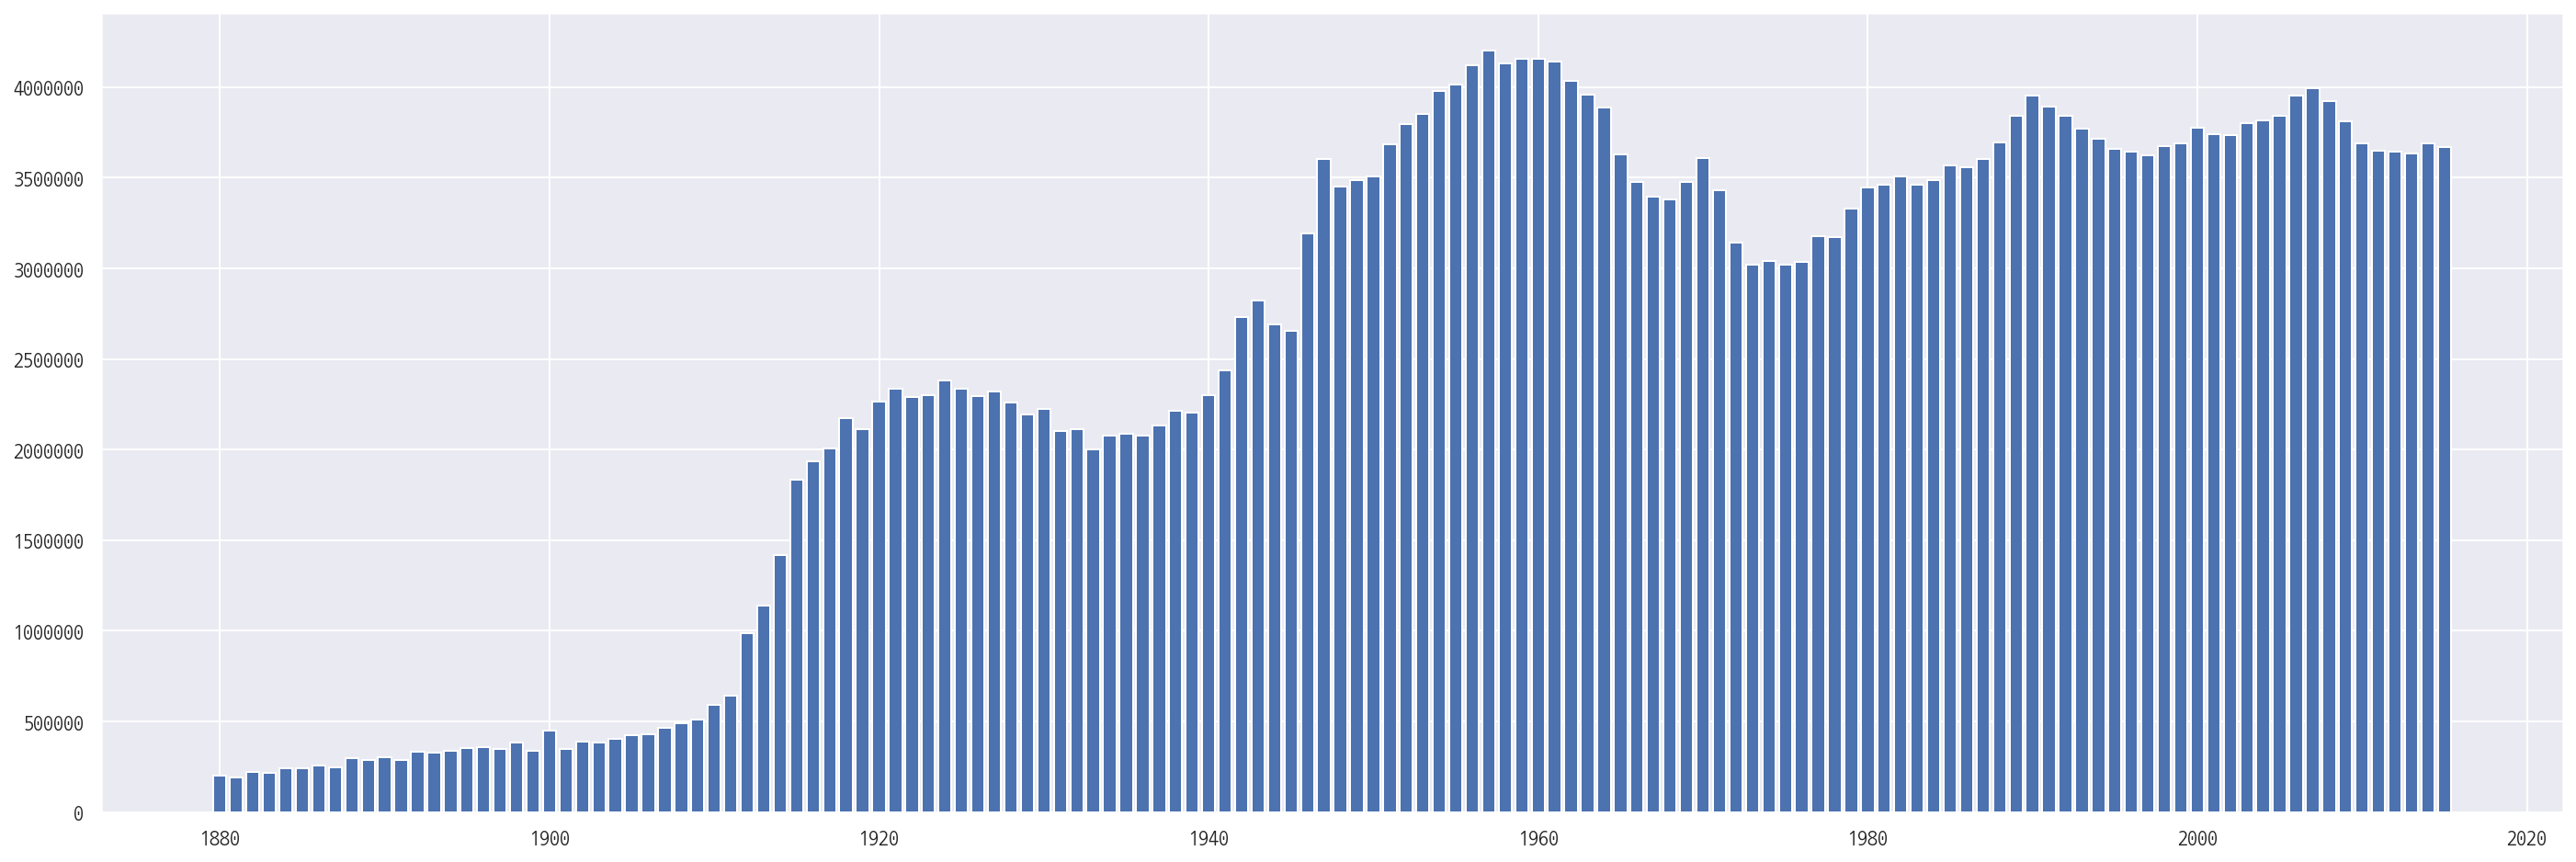

In [9]:
#그래프 그려보기
import matplotlib.pyplot as plt
%matplotlib inline

year = pd.read_csv('sample_data/birth_by_year.csv', header=None)
year.columns = ['year', 'birth']
plt.figure(figsize=(24, 8))
plt.bar('year', 'birth', data=year)
plt.show()

## 182 데이터처리하기 - 연도별 성별 출생아 수 계산하기
- 연도별 출생아 이름 - 출생아 수 데이터를 이용하여 연도별 성별 출생아 수를 계산

In [17]:
def countBirthsBySex():
    ret = []
    for y in range(1880, 2016):
        count_f = 0      # 여자아기 출생아수
        count_m = 0     # 남자아기 출생아수
        filename = 'sample_data/names/yob%d.txt' % y
        with open(filename, 'r') as f:
            data = f.readlines()
            for d in data:
                if d[-1] == '\n':
                    d = d[:-1]

                tmp = d.split(',')
                sex = tmp[1]
                birth = tmp[2]

                if sex == 'F':
                    count_f += int(birth)
                else:
                    count_m += int(birth)
        ret.append((y, count_f, count_m))
    return ret


result = countBirthsBySex()
with open('sample_data/birth_by_sex.csv', 'w') as f:
    for y, bf, bm in result:
        data = '%s,%s,%s\n' % (y, bf, bm)
        print(data)
        f.write(data)

1880,90992,110490

1881,91953,100743

1882,107848,113686

1883,112318,104627

1884,129020,114443

1885,133055,107799

1886,144534,110785

1887,145981,101415

1888,178624,120850

1889,178366,110582

1890,190376,111025

1891,185482,101193

1892,212341,122036

1893,212905,112317

1894,222922,115770

1895,233628,117396

1896,237918,119568

1897,234200,112758

1898,258770,122691

1899,233023,106212

1900,299822,150490

1901,239347,106469

1902,264075,122659

1903,261972,119233

1904,275371,128125

1905,291623,132318

1906,295304,133157

1907,318565,146830

1908,334315,154343

1909,347232,163999

1910,396503,194216

1911,418304,225967

1912,558113,429946

1913,624536,512558

1914,761561,654764

1915,983876,848603

1916,1044328,890095

1917,1081290,925508

1918,1157651,1013522

1919,1130134,980137

1920,1198287,1064445

1921,1233019,1101447

1922,1200951,1088286

1923,1206326,1096187

1924,1248902,1132749

1925,1217365,1115952

1926,1185350,1110516

1927,1192350,1126817

1928,1153140,1107542


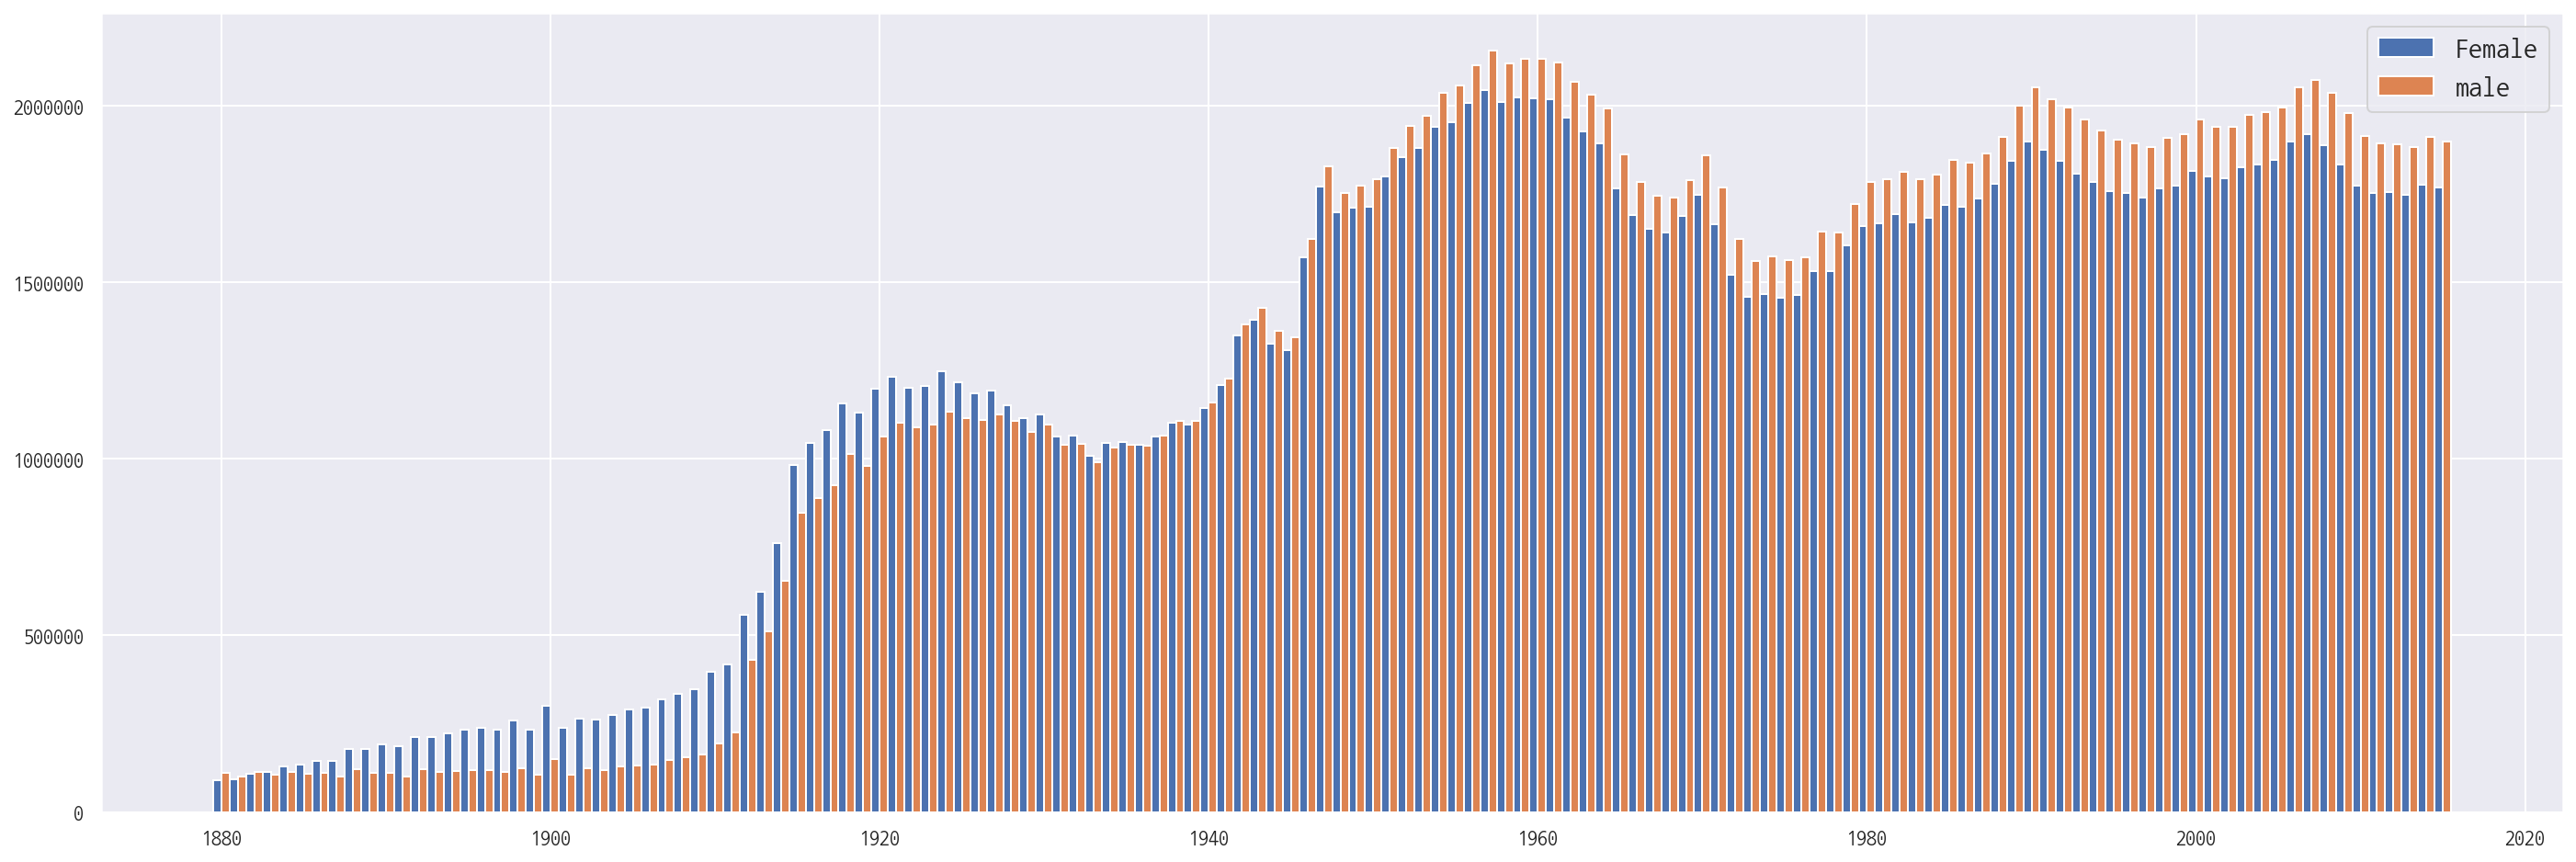

In [88]:
#그래프 그려보기
import matplotlib.pyplot as plt
%matplotlib inline

sex = pd.read_csv('sample_data/birth_by_sex.csv', header=None)
sex.columns = ['year', 'female', 'male']

plt.figure(figsize=(24, 8))
sex.year = sex.year - 0.25
p1 = plt.bar('year', 'female', data = sex, width = 0.5,)
sex.year = sex.year + 0.5
p2 = plt.bar('year', 'male', data = sex, width = 0.5)
plt.legend((p1[0], p2[0]), ('Female', 'male'), fontsize=15)
plt.show()

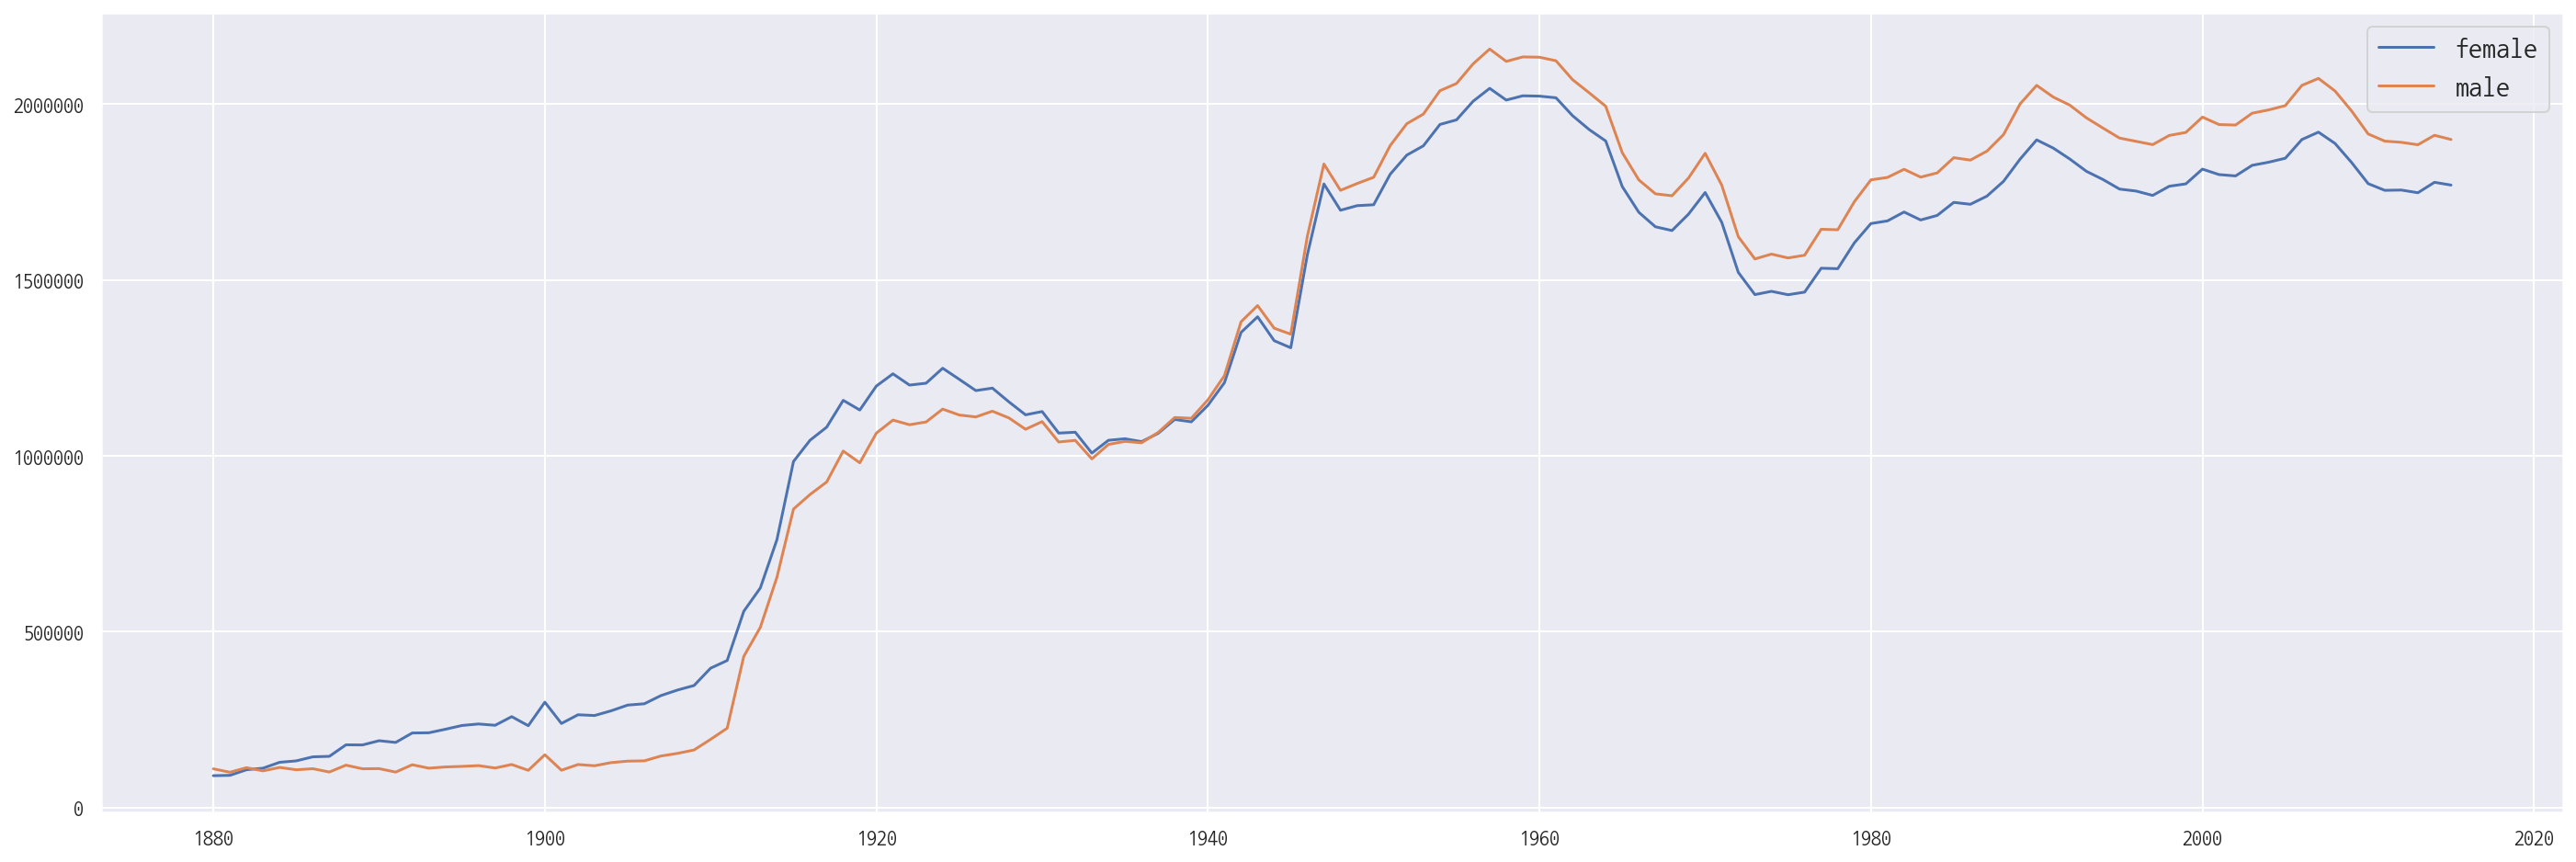

In [89]:
sex = pd.read_csv('sample_data/birth_by_sex.csv', header=None)
sex.columns = ['year', 'female', 'male']
plt.figure(figsize=(24,8))
plt.plot('year', 'female',data = sex)
plt.plot('year', 'male',data = sex)
plt.legend(fontsize = 15)
plt.show()

## 183 데이터 처리하기 - 연도별 인기있는 상위 10개 성별 출생아 이름 구하기
- 연도별 출생아 이름 - 출생아 수 데이터를 이용하여 연도별 성별 이름별 출생아 수를 계산해서 상위 10개 인기 아기이름을 추출

In [98]:
from os.path import exists


def gettop10babyname(year):
    namef = {}
    namem = {}

    filename = f'sample_data/names/yob{year}.txt'
    if not exists(filename):
        print(f'{filename} 파일이 존재하지 않습니다.')
        return None

    with open(filename, 'r') as f:
        data = f.readlines()
        for d in data:
            if d[-1] == '\n':
                d = d[:-1]

            tmp = d.split(',')
            name = tmp[0]
            sex = tmp[1]
            birth = tmp[2]

            if sex == 'F':
                ret = namef
            else:
                ret = namem

            if name in ret:
                ret[name] += int(birth)

            else:
                ret[name] = int(birth)

    retf = sorted(namef.items(), key=lambda x: x[1], reverse=True)
    retm = sorted(namem.items(), key=lambda x: x[1], reverse=True)

    for i, name in enumerate(retf):
        if i > 9:
            break
        print(f'Top{i+1} 여자 아기이름 : {name} ')

    for i, name in enumerate(retm):
        if i > 9:
            break
        print(f'Top{i+1} 남자 아기이름 : {name} ')


y = input('인기순 상위 10개 이름을 알고 싶은 출생년도를 입력하세요. : ')
gettop10babyname(y)

인기순 상위 10개 이름을 알고 싶은 출생년도를 입력하세요. :  2015


Top1 여자 아기이름 : ('Emma', 20355) 
Top2 여자 아기이름 : ('Olivia', 19553) 
Top3 여자 아기이름 : ('Sophia', 17327) 
Top4 여자 아기이름 : ('Ava', 16286) 
Top5 여자 아기이름 : ('Isabella', 15504) 
Top6 여자 아기이름 : ('Mia', 14820) 
Top7 여자 아기이름 : ('Abigail', 12311) 
Top8 여자 아기이름 : ('Emily', 11727) 
Top9 여자 아기이름 : ('Charlotte', 11332) 
Top10 여자 아기이름 : ('Harper', 10241) 
Top1 남자 아기이름 : ('Noah', 19511) 
Top2 남자 아기이름 : ('Liam', 18281) 
Top3 남자 아기이름 : ('Mason', 16535) 
Top4 남자 아기이름 : ('Jacob', 15816) 
Top5 남자 아기이름 : ('William', 15809) 
Top6 남자 아기이름 : ('Ethan', 14991) 
Top7 남자 아기이름 : ('James', 14705) 
Top8 남자 아기이름 : ('Alexander', 14460) 
Top9 남자 아기이름 : ('Michael', 14321) 
Top10 남자 아기이름 : ('Benjamin', 13608) 


## 184 웹서버 로그 처리하기 - 총 페이지뷰 수 계산하기
- 아파치 웹 서버 로그 파일을 이용해서 사이트 방문자의 총 페이지뷰 수를 계산

In [102]:
pageviews = 0

with open('sample_data/access_log', 'r') as f:
    logs = f.readlines()
    for log in logs:
        log = log.split()
        status = log[8]
        if status == '200':
            pageviews +=1
print(f'총 페이지뷰는 : {pageviews}')

총 페이지뷰는 : 327


In [107]:
logs

['180.76.15.5 - - [15/Nov/2015:03:45:45 +0000] "GET / HTTP/1.1" 200 6812\n',
 '180.76.15.143 - - [15/Nov/2015:03:46:26 +0000] "GET /samsblog/?p=2 HTTP/1.1" 301 -\n',
 '180.76.15.25 - - [15/Nov/2015:03:46:27 +0000] "GET /samsblog/?page_id=2 HTTP/1.1" 200 10650\n',
 '52.27.124.159 - - [15/Nov/2015:03:46:26 +0000] "POST /samsblog/wp-cron.php?doing_wp_cron=1447559186.3994779586791992187500 HTTP/1.0" 200 -\n',
 '180.76.15.6 - - [15/Nov/2015:03:46:34 +0000] "GET / HTTP/1.1" 200 6812\n',
 '61.160.213.32 - - [15/Nov/2015:03:50:37 +0000] "GET http://zc.qq.com/cgi-bin/chs/numreg/init? HTTP/1.0" 404 298\n',
 '61.160.213.55 - - [15/Nov/2015:03:58:12 +0000] "GET http://zc.qq.com/cgi-bin/chs/numreg/init? HTTP/1.0" 404 298\n',
 '54.214.205.186 - - [15/Nov/2015:04:45:21 +0000] "GET http://www.wikipedia.org/ HTTP/1.1" 404 2047\n',
 '180.76.15.134 - - [15/Nov/2015:05:14:07 +0000] "GET / HTTP/1.1" 200 6812\n',
 '180.76.15.24 - - [15/Nov/2015:05:15:03 +0000] "GET / HTTP/1.1" 200 6812\n',
 '66.249.79.123 -

## 185 웹서버 로그 처리하기 - 고유 방문자 수 계산하기
- 아파치 웹 서버 로그 파일을 이용해서 사이트의 고유 방문자 수를 계산

In [1]:
visit_ip = []

with open('sample_data/access_log', 'r') as f:
    logs = f.readlines()
    for log in logs:
        log = log.split()
        ip = log[0]
        if ip not in visit_ip:
            visit_ip.append(ip)
print(f'고유 방문자 수는 : {len(visit_ip)}')

고유 방문자 수는 : 99


## 186 웹서버 로그 처리하기 - 총 서비스 용량 계산하기
- 아파치 웹서버 로그 파일을 이용하여 사이트에서 사용자에게 서비스한 데이터의 총 용량을 계산

In [2]:
KB = 1024
total_service = 0

with open('sample_data/access_log', 'r') as f:
    logs = f.readlines()
    for log in logs:
        log = log.split()
        servicebyte = log[9]
        if servicebyte.isdigit():
            total_service += int(servicebyte)
total_service /= KB

print(f'총 서비스 용량 : {total_service}KB')

총 서비스 용량 : 29289.3779296875KB


## 187 웹서버 로그 처리하기 - 사용자별 서비스 용량 계산하기
- 아파치 웹서버 로그 파일을 이용해서 사용자별로 서비스한 데이터 용량을 계산

In [10]:
services = {}

with open('sample_data/access_log', 'r') as f:
    logs = f.readlines()
    for log in logs:
        log = log.split()
        ip = log[0]
        servicebyte = log[9]

        if servicebyte.isdigit():
            servicebyte = int(servicebyte)
        else:
            servicebyte = 0

        if ip not in services:
            services[ip] = servicebyte
        else:
            services[ip] += servicebyte

ret = sorted(services.items(), key=lambda x: x[1], reverse=True)

print('사용자 IP - 서비스 용량')
for ip, b in ret:
    print(f'[{ip}] - [{b}]')

사용자 IP - 서비스 용량
[223.62.67.5] - [26540048]
[223.62.67.194] - [2062270]
[64.79.100.43] - [444448]
[222.186.21.90] - [149616]
[180.76.15.144] - [34060]
[180.76.15.145] - [27248]
[180.76.15.6] - [20436]
[180.76.15.15] - [20436]
[180.76.15.149] - [20436]
[180.76.15.151] - [20436]
[180.76.15.158] - [20436]
[180.76.15.25] - [17462]
[180.76.15.16] - [17462]
[40.77.167.61] - [14314]
[180.76.15.10] - [13914]
[180.76.15.5] - [13624]
[180.76.15.24] - [13624]
[180.76.15.34] - [13624]
[180.76.15.7] - [13624]
[180.76.15.152] - [13624]
[180.76.15.146] - [13624]
[180.76.15.161] - [13624]
[180.76.15.28] - [13624]
[180.76.15.142] - [13624]
[180.76.15.136] - [13624]
[180.76.15.12] - [13624]
[180.76.15.141] - [13624]
[180.76.15.29] - [13624]
[180.76.15.9] - [13624]
[180.76.15.30] - [13624]
[180.76.15.156] - [13624]
[180.76.15.17] - [13624]
[180.76.15.11] - [13624]
[180.76.15.147] - [13624]
[180.76.15.18] - [13624]
[95.213.177.122] - [11554]
[157.55.39.218] - [11238]
[118.46.34.94] - [8306]
[157.55.39.130]

## 188 간단한 슈팅게임 만들기 - 게임화면 구성하기
- 간단한 슈팅게임을 만들어 보며 게임을 구현하는 기본적인 원리를 이해

In [16]:
import pygame

# 게임에 사용되는 전역변수 정의
BLACK = (0, 0, 0)
pad_width = 480
pad_heigh = 640

# 게임 실행 메인함수
def rungame():
    global gamepad, clock
    
    ongame = False
    while not ongame:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                doneflag = True
                
        # 게임화면을 검은색으로 채우고 화면을 업데이트 함
        gamepad.fill(BLACK)
        pygame.display.update()
        clock.tick(60)
        
    pygame.quit()
    
# 게임 초기화 함수
def initgame():
    global gamepad, clock
    
    pygame.init()
    gamepad = pygame.display.set_mode((pad_width, pad_heigh))
    pygame.display.set_caption('MyGalaga')
    clock = pygame.time.Clock()
    
initgame()
rungame()

## 189 간단한 슈팅게임 만들기 - 전투기 배치하기
- 간단한 슈팅게임을 만들어보며 게임을 구현하는 기본적인 원리를 이해

In [19]:
import pygame

# 게임에 사용되는 전역변수 정의
BLACK = (0, 0, 0)
pad_width = 480
pad_heigh = 640
fighter_width = 36
fighter_height = 38

# 게임에 등장하는 객체를 드로잉
def drawobject(obj, x, y):
    global gamepad
    gamepad.blit(obj, (x,y))

# 게임 실행 메인함수
def rungame():
    global gamepad, clock, fighter
    
    # 전투기 초기 위치 설정
    x = pad_width * 0.45
    y = pad_heigh * 0.9
    x_change = 0
    
    ongame = False
    while not ongame:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                ongame = True
                
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x_change -= 5
                elif event.key == pygame.K_RIGHT:
                    x_change += 5
                    
            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    x_change = 0
                
        # 게임화면을 검은색으로 채우고 화면을 업데이트 함
        gamepad.fill(BLACK)
        
        # 전투기 위치를 재조정
        x += x_change
        if x < 0 :
            x = 0
        elif x > pad_width - fighter_width:
            x = pad_width - fighter_width
            
        drawobject(fighter, x, y)
        pygame.display.update()
        clock.tick(60)
        
    pygame.quit()
    
# 게임 초기화 함수
def initgame():
    global gamepad, clock, fighter
    
    pygame.init()
    gamepad = pygame.display.set_mode((pad_width, pad_heigh))
    pygame.display.set_caption('MyGalaga')
    fighter = pygame.image.load('sample_data/fighter.png')
    clock = pygame.time.Clock()
    
initgame()
rungame()

## 190 간단한 슈팅게임 만들기 - 적 날아오게 하기
- 간단한 슈팅게임을 만들어보며 게임을 구현하는 기본적인 원리를 이해

In [21]:
import pygame
import random

# 게임에 사용되는 전역변수 정의
BLACK = (0, 0, 0)
pad_width = 480
pad_heigh = 640
fighter_width = 36
fighter_height = 38
enemy_width = 26
enemy_height = 20

# 게임에 등장하는 객체를 드로잉
def drawobject(obj, x, y):
    global gamepad
    gamepad.blit(obj, (x,y))

# 게임 실행 메인함수
def rungame():
    global gamepad, clock, fighter, enemy
    
    # 전투기 초기 위치 설정
    x = pad_width * 0.45
    y = pad_heigh * 0.9
    x_change = 0
    
    # 적 초기 위치 설정
    enemy_x = random.randrange(0, pad_width - enemy_width)
    enemy_y = 0
    enemy_speed = 3
    
    ongame = False
    while not ongame:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                ongame = True
                
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x_change -= 5
                elif event.key == pygame.K_RIGHT:
                    x_change += 5
                    
            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    x_change = 0
                
        # 게임화면을 검은색으로 채우고 화면을 업데이트 함
        gamepad.fill(BLACK)
        
        # 전투기 위치를 재조정
        x += x_change
        if x < 0 :
            x = 0
        elif x > pad_width - fighter_width:
            x = pad_width - fighter_width
            
        drawobject(fighter, x, y)
        
        # 적을 아래로 움직임
        enemy_y += enemy_speed
        if enemy_y > pad_heigh:
            enemy_y = 0
            enemy_x_y = random.randrange(0, pad_width - enemy_width)
            
        drawobject(enemy, enemy_x, enemy_y)
        
        pygame.display.update()
        clock.tick(60)
        
    pygame.quit()
    
# 게임 초기화 함수
def initgame():
    global gamepad, clock, fighter, enemy
    
    pygame.init()
    gamepad = pygame.display.set_mode((pad_width, pad_heigh))
    pygame.display.set_caption('MyGalaga')
    fighter = pygame.image.load('sample_data/fighter.png')
    enemy = pygame.image.load('sample_data/enemy.png')
    clock = pygame.time.Clock()
    
initgame()
rungame()

## 191 간단한 슈팅게임 만들기 - 무기 발사하기
- 간단한 슈팅게임을 만들어 보며 게임을 구현하는 기본적인 원리를 이해

In [23]:
import pygame
import random

# 게임에 사용되는 전역변수 정의
BLACK = (0, 0, 0)
pad_width = 480
pad_heigh = 640
fighter_width = 36
fighter_height = 38
enemy_width = 26
enemy_height = 20

# 게임에 등장하는 객체를 드로잉


def drawobject(obj, x, y):
    global gamepad
    gamepad.blit(obj, (x, y))

# 게임 실행 메인함수


def rungame():
    global gamepad, clock, fighter, enemy, bullet

    # 무기 좌표를 위한 리스트 자료
    bullet_xy = []

    # 전투기 초기 위치 설정
    x = pad_width * 0.45
    y = pad_heigh * 0.9
    x_change = 0

    # 적 초기 위치 설정
    enemy_x = random.randrange(0, pad_width - enemy_width)
    enemy_y = 0
    enemy_speed = 3

    ongame = False
    while not ongame:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                ongame = True

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x_change -= 5
                elif event.key == pygame.K_RIGHT:
                    x_change += 5

                elif event.key == pygame.K_LCTRL:
                    if len(bullet_xy) < 2:
                        bullet_x = x + fighter_width/2
                        bullet_y = y + fighter_height
                        bullet_xy.append([bullet_x, bullet_y])

            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    x_change = 0

        # 게임화면을 검은색으로 채우고 화면을 업데이트 함
        gamepad.fill(BLACK)

        # 전투기 위치를 재조정
        x += x_change
        if x < 0:
            x = 0
        elif x > pad_width - fighter_width:
            x = pad_width - fighter_width

        drawobject(fighter, x, y)

        # 전투기 무기 발사 화면에 그리기
        if len(bullet_xy) != 0:
            for i, bxy in enumerate(bullet_xy):
                bxy[1] -= 10
                bullet_xy[i][1] = bxy[1]

                if bxy[1] <= 0:
                    try:
                        bullet_xy.remove(bxy)
                    except:
                        pass
        if len(bullet_xy) != 0:
            for bx, by in bullet_xy:
                drawobject(bullet, bx, by)
        
        
        # 적을 아래로 움직임
        enemy_y += enemy_speed
        if enemy_y > pad_heigh:
            enemy_y = 0
            enemy_x_y = random.randrange(0, pad_width - enemy_width)
            
        drawobject(enemy, enemy_x, enemy_y)
        
        pygame.display.update()
        clock.tick(60)
        
    pygame.quit()
    
# 게임 초기화 함수
def initgame():
    global gamepad, clock, fighter, enemy, bullet
    
    pygame.init()
    gamepad = pygame.display.set_mode((pad_width, pad_heigh))
    pygame.display.set_caption('MyGalaga')
    fighter = pygame.image.load('sample_data/fighter.png')
    enemy = pygame.image.load('sample_data/enemy.png')
    bullet = pygame.image.load('sample_data/bullet.png')
    clock = pygame.time.Clock()
    
initgame()
rungame()

## 192 간단한 슈팅게임 만들기 - 게임규칙 적용하기
- 간단한 슈팅게임을 만들어보며 게임을 구현하는 기본적인 원리를 이해

In [29]:
import pygame
import random
from time import sleep

# 게임에 사용되는 전역변수 정의
BLACK = (0, 0, 0)
RED = (255, 0, 0)
pad_width = 480
pad_heigh = 640
fighter_width = 36
fighter_height = 38
enemy_width = 26
enemy_height = 20

# 적을 맞춘 개수 계산
def drawscore(count):
    global gamepad
    font = pygame.font.SysFont(None, 20)
    text = font.render('Enemy Kills : ' +str(count), True, (255,255,255))
    gamepad.blit(text, (0,0))
    
# 적이 화면 아래로 통과한 개수
def drawpassed(count):
    global gamepad
    font = pygame.font.SysFont(None, 20)
    text = font.render('Enemy Passed : ' +str(count), True, RED)
    gamepad.blit(text, (360,0))
    
# 화면에 글씨 보이게 하기
def dispmessage(text):
    global gamepad
    textfont = pygame.font.Font('freesansbold.ttf', 80)
    text = textfont.render(text, True, RED)
    textpos = text.get_rect()
    textpos.center = (pad_width/2, pad_heigh/2)
    gamepad.blit(text, textpos)
    pygame.display.update()
    sleep(2)
    rungame()
    
# 전투기가 적과 충돌했을때 메세지 출력
def crash():
    global gamepad
    dispmessage('Game Over!')
    
# 게임오버 메세지 보이기
def gameover():
    global gamepad
    dispmessage('Game Over!')
    
# 게임에 등장하는 객체를 드로잉
def drawobject(obj, x, y):
    global gamepad
    gamepad.blit(obj, (x, y))

# 게임 실행 메인함수
def rungame():
    global gamepad, clock, fighter, enemy, bullet
    
    # 전투기 무기에 적이 맞았을 경우 True로 설정되는 플래그
    isshot = False
    shotcount = 0
    enemypassed = 0

    # 무기 좌표를 위한 리스트 자료
    bullet_xy = []

    # 전투기 초기 위치 설정
    x = pad_width * 0.45
    y = pad_heigh * 0.9
    x_change = 0

    # 적 초기 위치 설정
    enemy_x = random.randrange(0, pad_width - enemy_width)
    enemy_y = 0
    enemy_speed = 3

    ongame = False
    while not ongame:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                ongame = True

            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_LEFT:
                    x_change -= 5
                elif event.key == pygame.K_RIGHT:
                    x_change += 5

                elif event.key == pygame.K_LCTRL:
                    if len(bullet_xy) < 2:
                        bullet_x = x + fighter_width/2
                        bullet_y = y + fighter_height
                        bullet_xy.append([bullet_x, bullet_y])

            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT or event.key == pygame.K_RIGHT:
                    x_change = 0

        # 게임화면을 검은색으로 채우고 화면을 업데이트 함
        gamepad.fill(BLACK)

        # 전투기 위치를 재조정
        x += x_change
        if x < 0:
            x = 0
        elif x > pad_width - fighter_width:
            x = pad_width - fighter_width
        
        # 게이머 전투기가 적과 충돌했는지 체크
        if y < enemy_y + enemy_height:
            if (enemy_x > x and enemy_x < x + fighter_width) or \
            (enemy_x + enemy_width > x and enemy_x + enemy_width < x + fighter_width):
                crash()
            
        drawobject(fighter, x, y)

        # 전투기 무기 발사 화면에 그리기
        if len(bullet_xy) != 0:
            for i, bxy in enumerate(bullet_xy):
                bxy[1] -= 10
                bullet_xy[i][1] = bxy[1]
                
                # 전투기 무기가 적을 격추했을 경우
                if bxy[1] < enemy_y:
                    if bxy[0] > enemy_x  and bxy[0] < enemy_x + enemy_width:
                        bullet_xy.remove(bxy)
                        isshot = True
                        shotcount += 1

                if bxy[1] <= 0:
                    try:
                        bullet_xy.remove(bxy)
                    except:
                        pass
        if len(bullet_xy) != 0:
            for bx, by in bullet_xy:
                drawobject(bullet, bx, by)
        
        drawscore(shotcount)

        # 적을 아래로 움직임
        enemy_y += enemy_speed
        if enemy_y > pad_heigh:
            enemy_y = 0
            enemy_x = random.randrange(0, pad_width - enemy_width)
            enemypassed += 1
            
        if enemypassed == 3:
            gameover()
            
        drawpassed(enemypassed)
        
        # 적이 무기에 맞았는지 체크하고 맞았으면 스피드 업
        if isshot:
            enemy_speed += 0.5
            if enemy_speed >= 5:
                enemy_speed = 5
                
            enemy_x = random.randrange(0, pad_width-enemy_width)
            enemy_y = 0
            isshot = False
            
        drawobject(enemy, enemy_x, enemy_y)

        pygame.display.update()
        clock.tick(60)

    pygame.quit()

# 게임 초기화 함수
def initgame():
    global gamepad, clock, fighter, enemy, bullet

    pygame.init()
    gamepad = pygame.display.set_mode((pad_width, pad_heigh))
    pygame.display.set_caption('MyGalaga')
    fighter = pygame.image.load('sample_data/fighter.png')
    enemy = pygame.image.load('sample_data/enemy.png')
    bullet = pygame.image.load('sample_data/bullet.png')
    clock = pygame.time.Clock()


initgame()
rungame()

error: display Surface quit